In [1]:
# Common Imports:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#load the dataset provided
df = pd.read_csv("C://Users/riya/OneDrive/Desktop/salarydata.csv")

In [3]:
df.shape

(32561, 14)

In [4]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [5]:
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# checking datatypes
df.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [7]:
# running .str.strip() on all string objects
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [8]:
# describing the dataframe:
df.describe(include = 'all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32561.000000,32561,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
df.workclass.value_counts()
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [10]:
# checking to see if the unknown rows line up:

'Workclass feature:'
df.loc[df.workclass == '?'].index

'Occupation feature'
df.loc[df.occupation == '?'].index

Int64Index([   27,    61,    69,    77,   106,   128,   149,   154,   160,
              187,
            ...
            32426, 32477, 32490, 32494, 32525, 32530, 32531, 32539, 32541,
            32542],
           dtype='int64', length=1843)

In [11]:
# which rows are there that these don't line up?

unknown_occ = df.loc[df.occupation == '?']

unknown_occ.loc[unknown_occ.workclass != '?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
5361,18,Never-worked,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [12]:
df.loc[df.workclass == 'Never-worked', 'workclass'] = '?'

In [13]:
# checking out our target salary class:
df.salary.value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [14]:
# cleaning this up and removing the period from those stray values so our values line up better
df.loc[df.salary == '<=50K.', 'salary'] = '<=50K'
df.loc[df.salary == '>50K.', 'salary'] = '>50K'

In [15]:
# are there any other missing / null values?
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

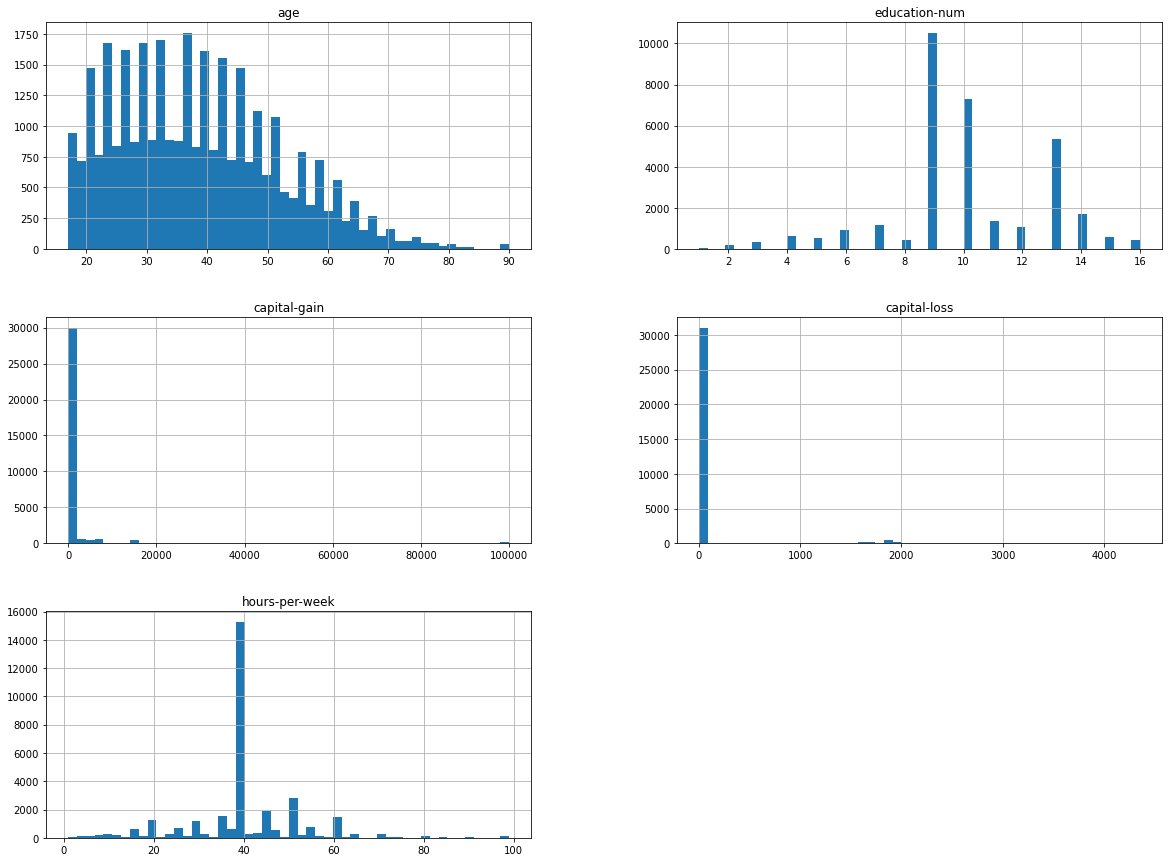

In [16]:
# distributions:
df.hist(bins=50, figsize=(20,15))

# Machine Learning
# Data Preparation: Feature Engineering, Label Encoding, & One-Hot Encoding¶

In [17]:
# making a copy of the dataframe:
train = df.copy()

In [18]:
train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
# education is not needed since education_num represents this ordinal column well
train.drop(columns=['education'], inplace=True)

In [20]:
# one-hot encoding all our nominal data columns leaving our first column as existent because we want all the variables there for our correlation maps:
train = pd.get_dummies(train, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], drop_first=False)

In [21]:
# one-hot encoding our income data columns with dropping first = True because we only want ONE Y variable. Double Class classification:
train = pd.get_dummies(train, columns=['salary'], drop_first=True)

In [22]:
train.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary_>50K
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
train.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-

# Correlation Matrix & Feature Selection¶

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

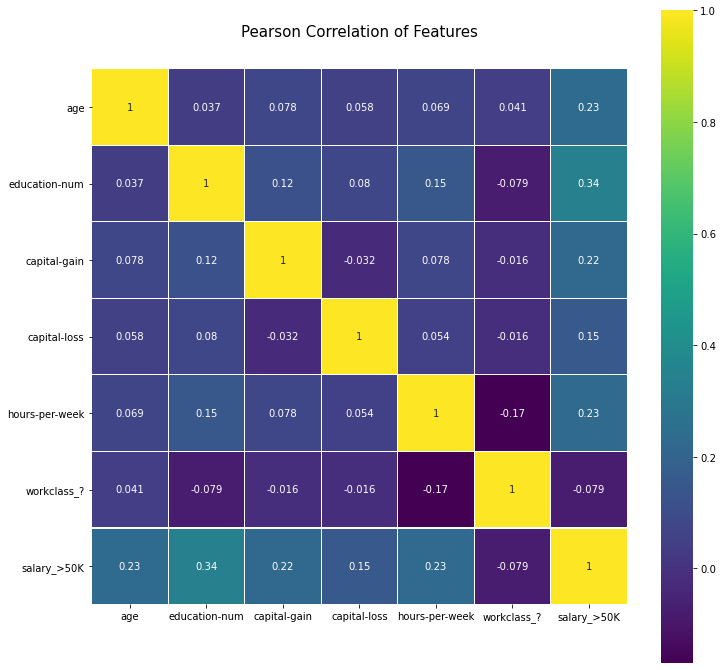

In [25]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.iloc[:,[0, 1, 2, 3, 4, 5, -1]].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


<AxesSubplot:title={'center':'WorkClass Correlation'}>

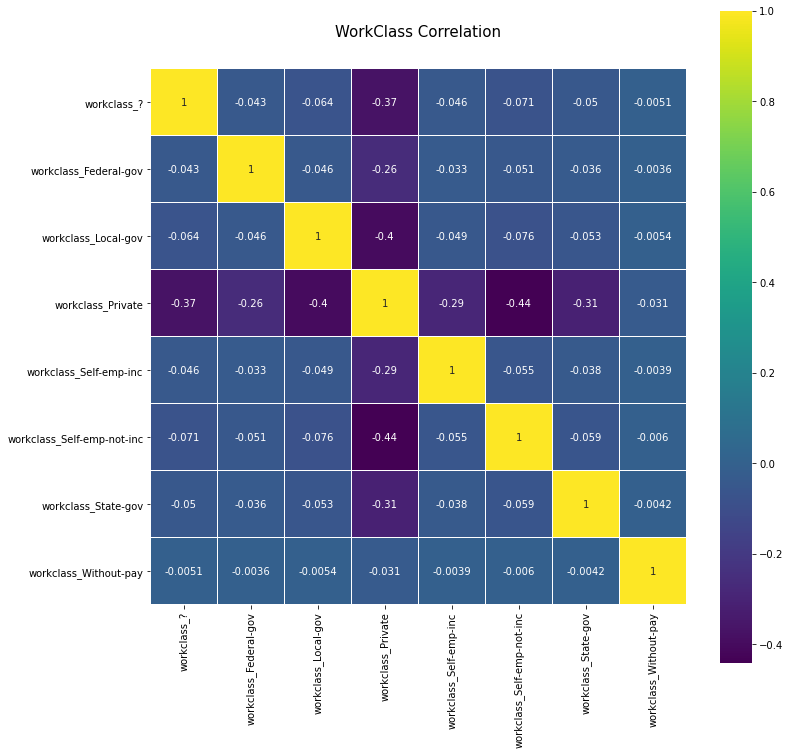

In [26]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('WorkClass Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('workclass') | train.columns.str.contains('income')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

<AxesSubplot:title={'center':'Marital Correlation'}>

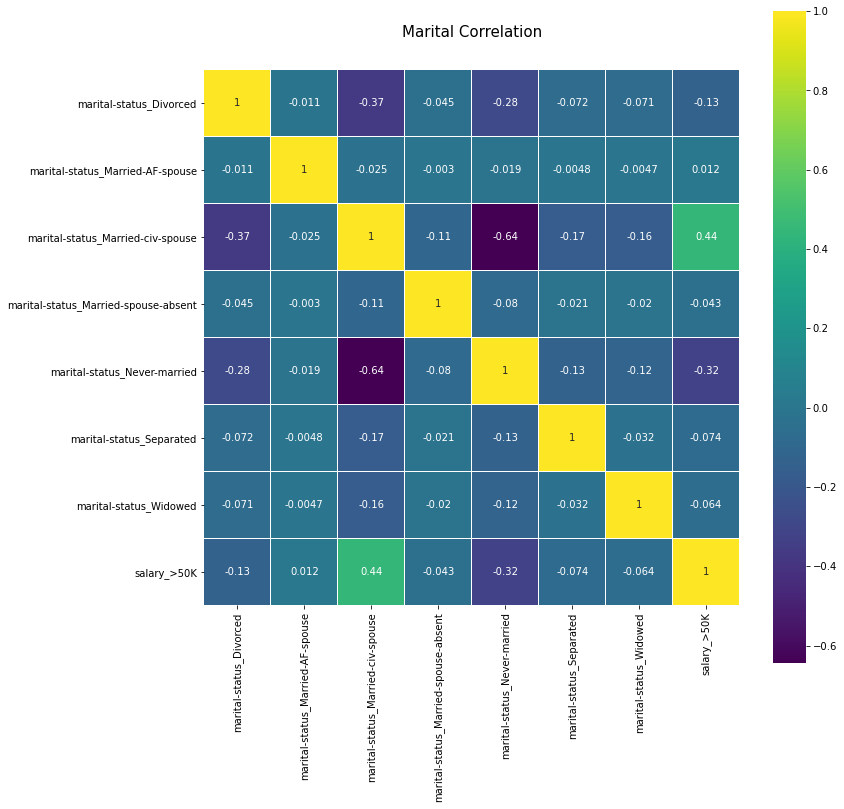

In [27]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Marital Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('marital-status') | train.columns.str.contains('salary')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

<AxesSubplot:title={'center':'Occupation Correlation'}>

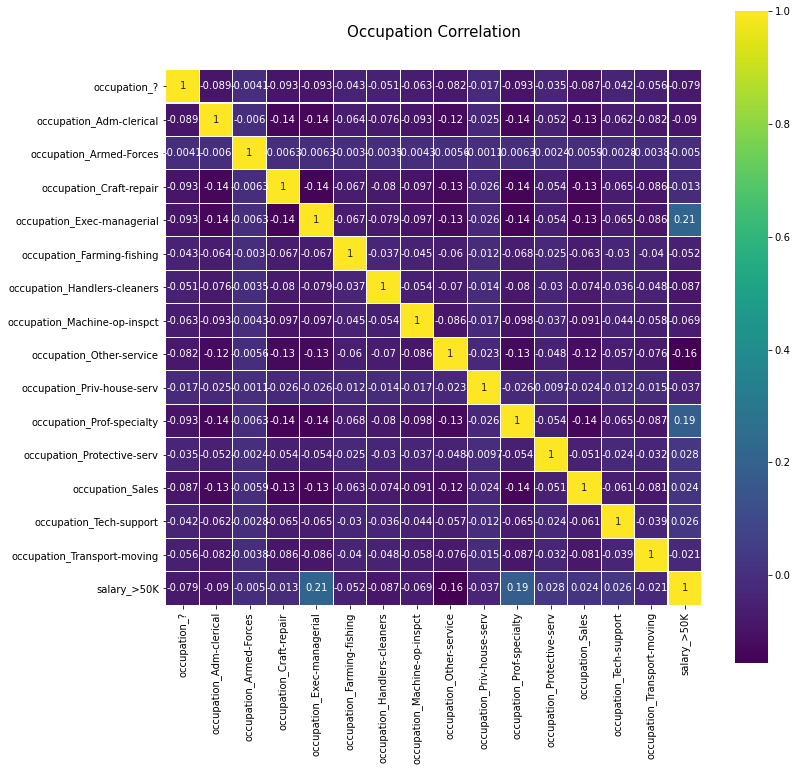

In [28]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Occupation Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('occupation') | train.columns.str.contains('salary')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

<AxesSubplot:title={'center':'Relationship Correlation'}>

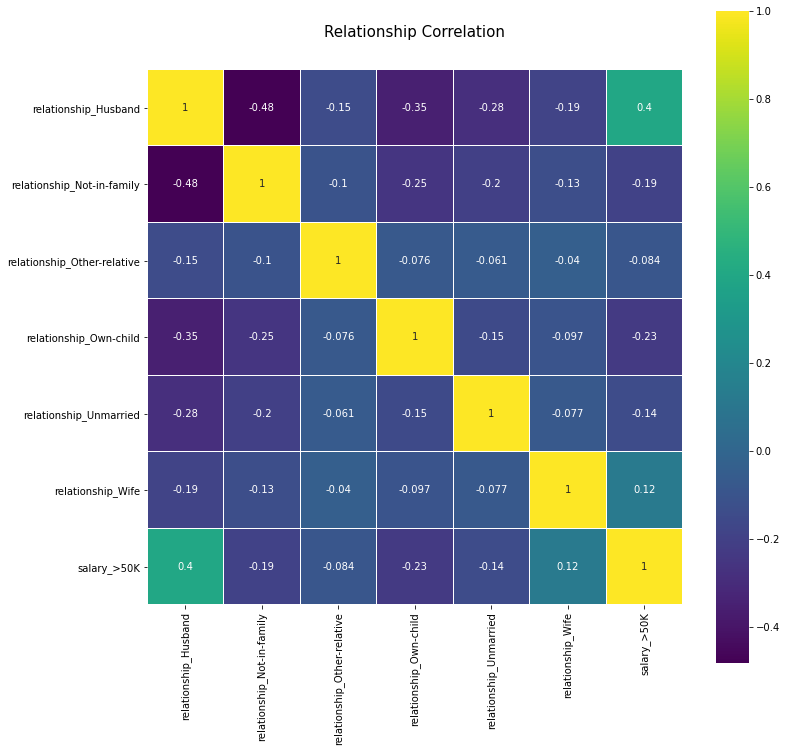

In [29]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Relationship Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('salary') | train.columns.str.contains('relationship')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [30]:
# A lot of the values are co-correlated. Let's check them, and then remove them from our training set.

<AxesSubplot:title={'center':'Marital / Relationship / Sex Co-Correlation'}>

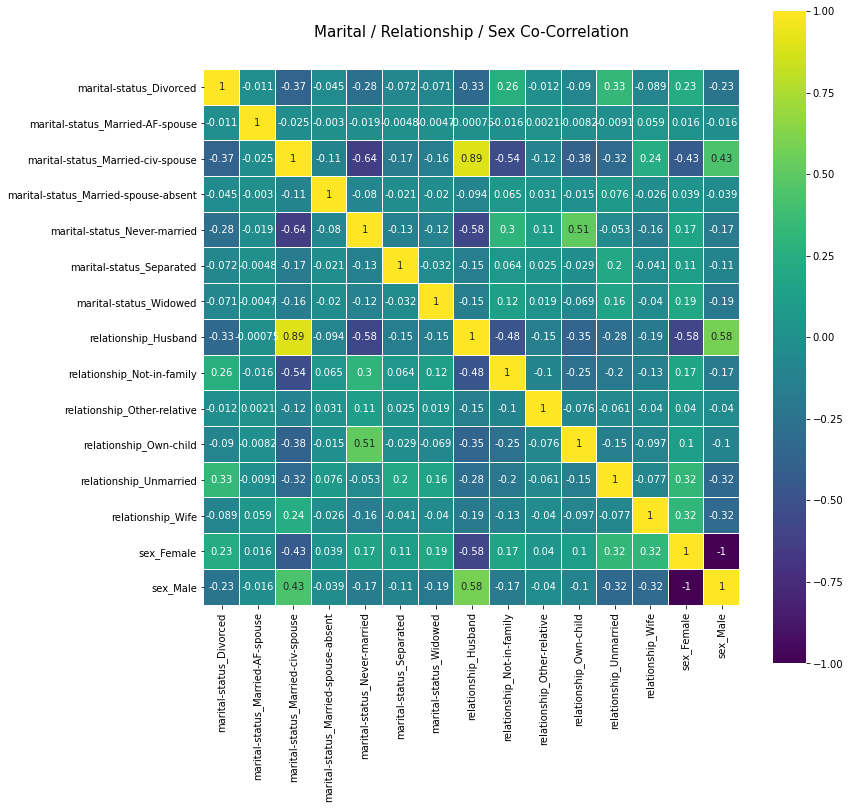

In [31]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Marital / Relationship / Sex Co-Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('marital-status') | train.columns.str.contains('relationship') | train.columns.str.contains('sex') | train.columns.str.contains('income')].corr() ,
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [33]:
# All three of these features are co-correlated.
# Let's just keep relationship since this seems to contain the most inobscure information.

In [34]:
# removing all the marital and sex features
train = train.loc[:, (train.columns.str.contains('marital-status') == False) & (train.columns.str.contains('sex') == False)]

<AxesSubplot:title={'center':'Workclass / Occupation Co-Correlation'}>

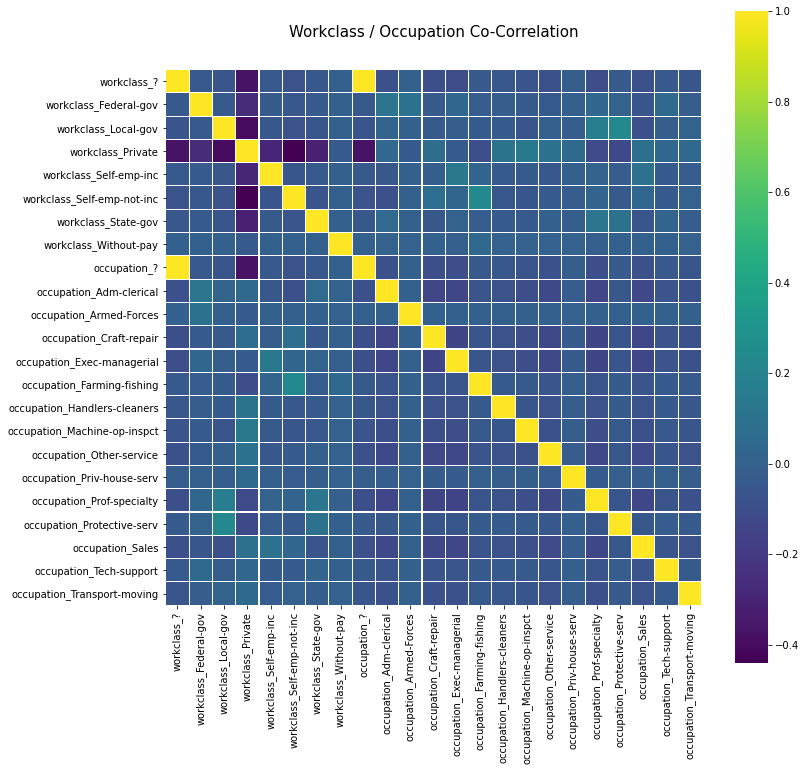

In [35]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Workclass / Occupation Co-Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('workclass') | train.columns.str.contains('occupation') | train.columns.str.contains('income')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)

In [36]:
# Both of these values are highly co-correlated, 
# and since occupation has more strong correlation with income, I'll remove the workclass feature.

In [37]:
# removing all the workclass features
train = train.loc[:, train.columns.str.contains('workclass') == False]

<AxesSubplot:title={'center':'Race / Native Country Co-Correlation'}>

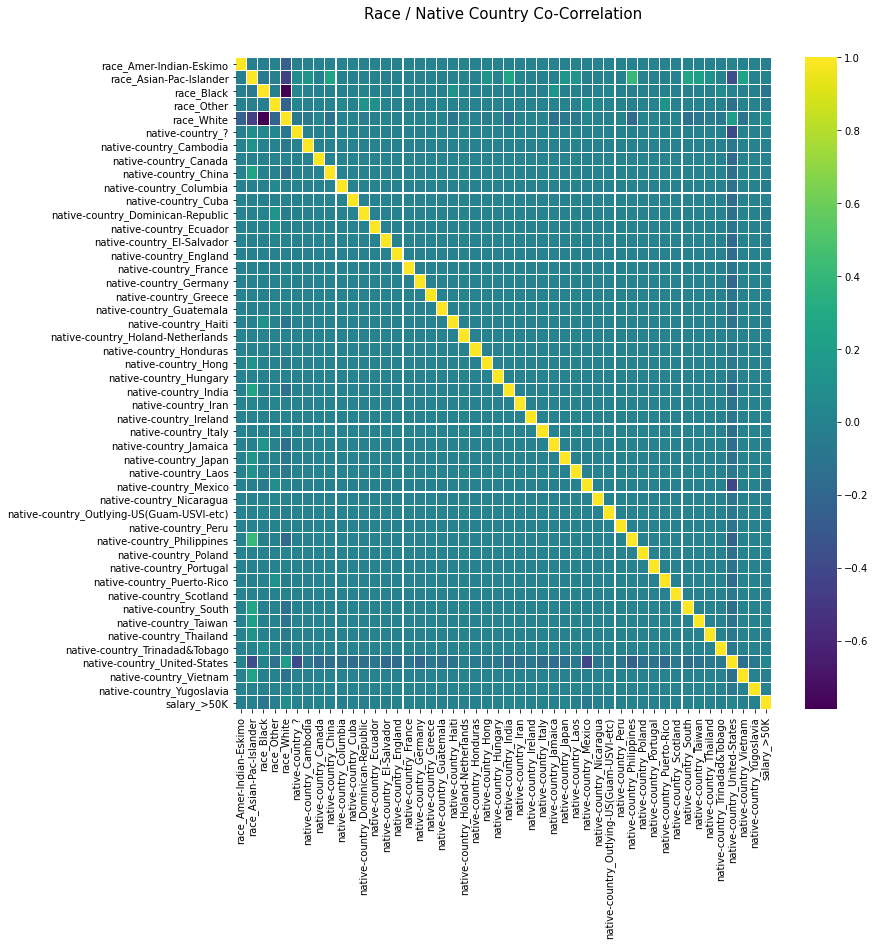

In [38]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Race / Native Country Co-Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('race') | train.columns.str.contains('native') | train.columns.str.contains('salary')].corr(),
    linewidths=0.1,vmax=1.0, square=False, cmap=colormap, linecolor='white', annot=False)

In [39]:
# removing all the native_country features
train = train.loc[:, train.columns.str.contains('native') == False]

In [43]:
train

,age,education-num,capital-gain,capital-loss,hours-per-week,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,salary_>50K
0,39,13,2174,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,38,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,7,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32557,40,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
32558,58,9,0,0,40,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
32559,22,9,0,0,20,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [63]:
###### SPLITTING OUR DATA INTO X AND Y:
X = train.iloc[:, 0:-1]
y = train.iloc[:, -1]

In [65]:
X.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White'],
      dtype='object')

In [45]:
# Import module to split dataset into train and test
from sklearn.model_selection import train_test_split

# Split data set into training and test sets - setting random state to make the results replicable
### NOTE: might have to reshape some columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Decision Tree 

In [46]:
# Accuracy score:
from sklearn.metrics import accuracy_score

In [47]:
from sklearn import tree

# Create Decision Tree with max_depth = 4 - can use grid search or cross validation later to find best max depth
decision_tree = tree.DecisionTreeClassifier(max_depth = 4)

# fit our model using our training data
decision_tree.fit(X_train, y_train)

y_pred_tree = decision_tree.predict(X_test)

In [48]:
'Accuracy of our tree model'
f'{round(accuracy_score(y_test, y_pred_tree) * 100, 2)} %'

'84.65 %'

# Comparing Models and Accuracy¶

In [50]:
# Logistic Regression:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred_log = logmodel.predict(X_test)

'Logistic Regression Accuracy:'
f'{round(accuracy_score(y_test, y_pred_log) * 100, 2)} %'

C:\Users\riya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'84.22 %'

In [51]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

'KNN Accuracy:'
f'{round(accuracy_score(y_test, y_pred_knn) * 100, 2)} %'

'84.19 %'

In [52]:
# SVM
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

'SVM Accuracy:'
f'{round(accuracy_score(y_test, y_pred_svm) * 100, 2)} %'

C:\Users\riya\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


'84.19 %'

In [53]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

'Random Forest Accuracy:'
f'{round(accuracy_score(y_test, y_pred_rf) * 100, 2)} %'

'84.78 %'

In [54]:
# printing out the feature importances. The score which is the highest is the root split - the most correlative feature that splits the most.

rndf_namescore = {}

for name, score in zip(train.columns, rnd_clf.feature_importances_):
    rndf_namescore[name] = score

# sorting by value in reverse order
rndf_namescore = sorted(rndf_namescore.items(), key=lambda kv: kv[1], reverse=True)

# printing it:
"Most important features that can predict income ranked:"
rndf_namescore

[('relationship_Husband', 0.23645437110827824),
 ('capital-gain', 0.19638834825050686),
 ('education-num', 0.16176351475212808),
 ('age', 0.08521477260963384),
 ('hours-per-week', 0.055992470747435706),
 ('relationship_Not-in-family', 0.04804207403945883),
 ('capital-loss', 0.04061959807686514),
 ('occupation_Exec-managerial', 0.03825668923891416),
 ('relationship_Own-child', 0.03811456082276836),
 ('occupation_Prof-specialty', 0.028944695900992298),
 ('relationship_Wife', 0.020532725488880375),
 ('relationship_Unmarried', 0.020426056391957163),
 ('occupation_Other-service', 0.010501700760474074),
 ('relationship_Other-relative', 0.002493886832280486),
 ('occupation_Farming-fishing', 0.002189456832631072),
 ('occupation_Tech-support', 0.0018792379069956476),
 ('occupation_Handlers-cleaners', 0.0018730272782009473),
 ('occupation_Sales', 0.0017820768223024178),
 ('race_Black', 0.0015407983732293993),
 ('occupation_Craft-repair', 0.0014185695181317126),
 ('occupation_Machine-op-inspct', 

In [55]:
# ENSEMBLE Model of all the 5 above with Hard Voting:
from sklearn.ensemble import VotingClassifier

# passing our previous models to our ensemble model:
voting_clf = VotingClassifier(
    estimators=[('dt', decision_tree), ('lr', logmodel), ('kn', knn), ('svm', svm_model), ('rf', rnd_clf)],
    voting='hard')

# fit the ensemble
voting_clf.fit(X_train, y_train)

# predicting the ensemble
y_pred_ensemble = voting_clf.predict(X_test)

'Ensemble Accuracy:'
f'{round(accuracy_score(y_test, y_pred_ensemble) * 100, 2)} %'

C:\Users\riya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\riya\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


'85.49 %'

In [56]:
# ENSEMBLE Model of 4 out of 5 above with Soft Voting since svm doesn't go through soft voting well since linearsvc doesn't allow predict_prob_

voting_clf_soft = VotingClassifier(
    estimators=[('dt', decision_tree), ('lr', logmodel), ('kn', knn), ('rf', rnd_clf)],
    voting='soft')

# fit the ensemble
voting_clf_soft.fit(X_train, y_train)

# predicting the ensemble
y_pred_ensemble_soft = voting_clf_soft.predict(X_test)

'Ensemble (Soft Voting) Accuracy:'
f'{round(accuracy_score(y_test, y_pred_ensemble_soft) * 100, 2)} %'

C:\Users\riya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'85.84 %'

In [57]:
### BAGGING ensemble with decision trees:
from sklearn.ensemble import BaggingClassifier

bag_clf_tree = BaggingClassifier(
    tree.DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_tree.fit(X_train, y_train)
y_pred_bag_tree = bag_clf_tree.predict(X_test)

'Bagging Ensemble Decision Tree Accuracy:'
f'{round(accuracy_score(y_test, y_pred_bag_tree) * 100, 2)} %'

'84.63 %'

In [58]:
### BAGGING ensemble with random forest:
bag_clf_rf = BaggingClassifier(
    RandomForestClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_rf.fit(X_train, y_train)
y_pred_bag_rf = bag_clf_rf.predict(X_test)

'Bagging Ensemble Random Forest Accuracy:'
f'{round(accuracy_score(y_test, y_pred_bag_rf) * 100, 2)} %'

'83.8 %'

In [60]:
### BAGGING ensemble with Logistic Regression:
bag_clf_lr = BaggingClassifier(
    LogisticRegression(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_lr.fit(X_train, y_train)
y_pred_bag_lr = bag_clf_lr.predict(X_test)

'Bagging Ensemble Logistic Regression Accuracy:'
f'{round(accuracy_score(y_test, y_pred_bag_lr) * 100, 2)} %'

'82.94 %'

In [61]:
### BAGGING ensemble with KNN:
bag_clf_knn = BaggingClassifier(
    KNeighborsClassifier(n_neighbors=4), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_knn.fit(X_train, y_train)
y_pred_bag_knn = bag_clf_knn.predict(X_test)

'Bagging Ensemble KNN Accuracy:'
f'{round(accuracy_score(y_test, y_pred_bag_knn) * 100, 2)} %'

'81.5 %'

In [62]:
# ADABoost Classifier with decision trees
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=0.5, random_state=42)

ada_clf.fit(X_train, y_train)

y_pred_adab_dtree = ada_clf.predict(X_test)

'ADABoost Classifier with Decision Tree Accuracy:'
f'{round(accuracy_score(y_test, y_pred_adab_dtree) * 100, 2)} %'

'87.07 %'